In [1]:
import sys
sys.path.append('/home/n31v/workspace/Fedot.Industrial')
import pandas as pd

from fedot_ind.core.architecture.postprocessing.cv_results_parser import *
from utils import *

ds_name = 'FashionMNIST'
exp_root = '/media/n31v/data/results/' + ds_name

In [ ]:
create_mean_exps(exp_root)

In [2]:
exps = exp_list(ds_name)
svd_channel = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD channel'],
    metric='f1'
)
svd_spatial = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD spatial'],
    metric='f1'
)
sfp_energy = compare_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=exps['SFP energy'],
    metric='f1'
)
sfp_per = compare_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=exps['SFP percentage'],
    metric='f1'
)
best = get_best_metric(
    exp_path=exps['Baseline'],
    metric='f1'
)
print(f'best f1: {best:.3f}')

best f1: 0.920


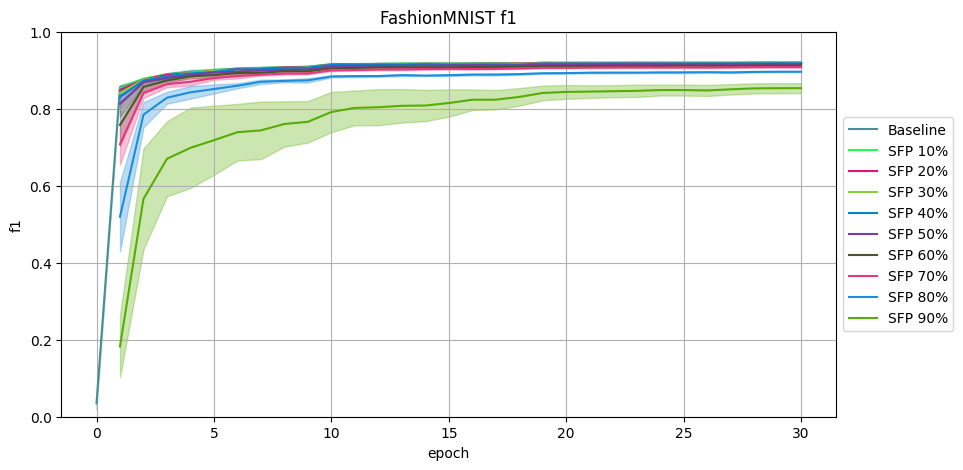

In [3]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SFP percentage'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

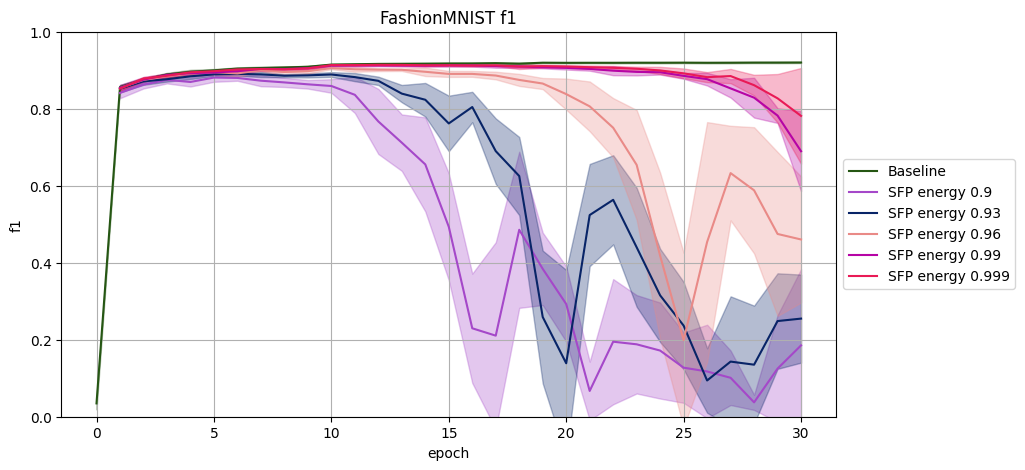

In [4]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SFP energy'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

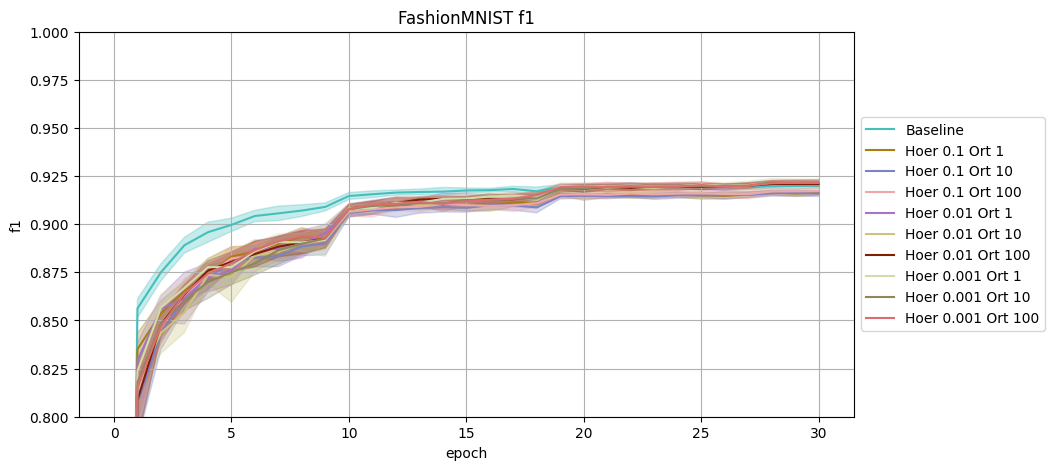

In [7]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD channel'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0.8, 1),
    figsize=(10, 5),
)

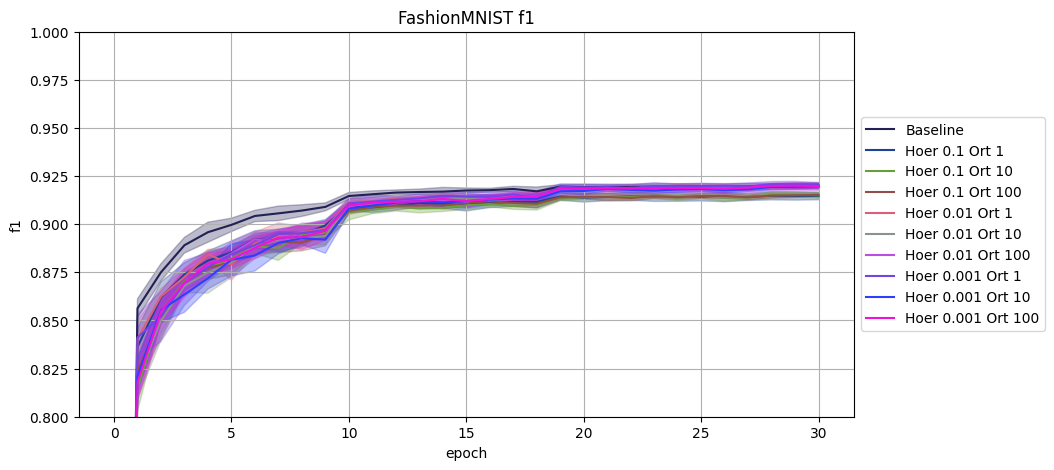

In [8]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD spatial'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0.8, 1),
    figsize=(10, 5),
)

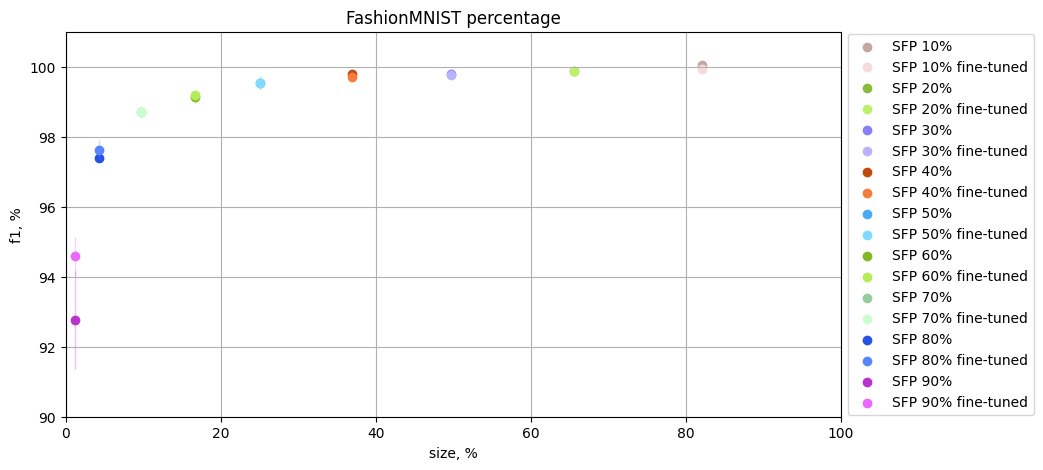

In [9]:
ax = show_sfp_results(
    sfp_exps=sfp_per,
    figsize=(10, 5),
    title=f'{ds_name} percentage',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 101),
    xlim=(0, 100)
)

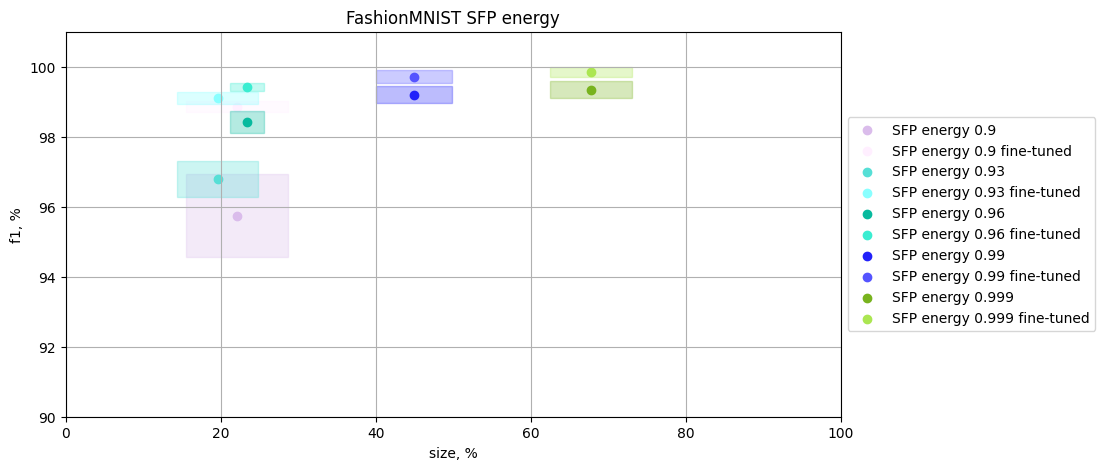

In [10]:
ax = show_sfp_results(
    sfp_exps=sfp_energy,
    figsize=(10, 5),
    title=f'{ds_name} SFP energy',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 101),
    xlim=(0, 100)
)

In [11]:
channel_exps = {k: v for k, v in svd_channel.items() if 'Hoer 0.01' in k}

In [ ]:
channel_exps = {k: v for k, v in svd_channel.items() if k.endswith('Ort 10')}

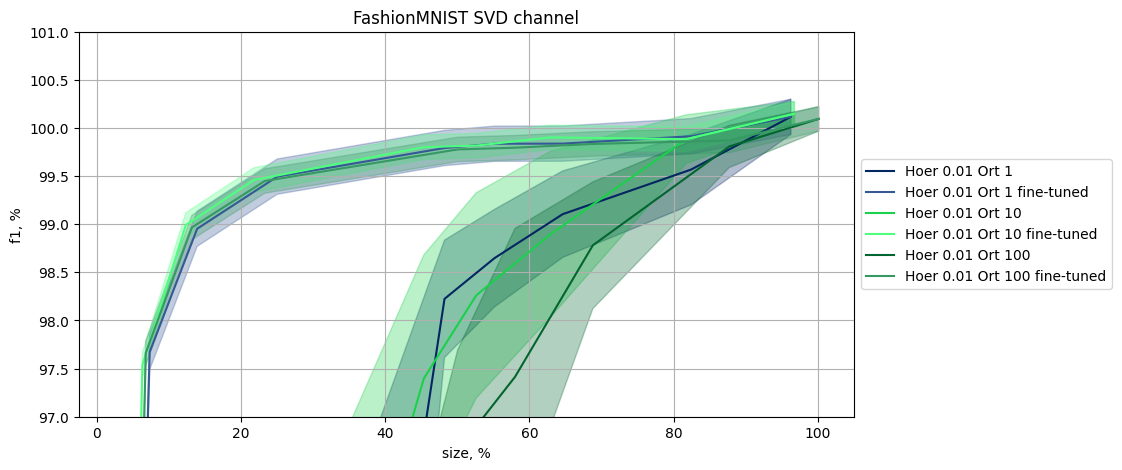

In [12]:
ax = show_svd_results(
    svd_exps=channel_exps,
    figsize=(10, 5),
    title=f'{ds_name} SVD channel',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(97, 101),
    # xlim=(0, 100)
)

In [13]:
spatial_exps = {k: v for k, v in svd_spatial.items() if 'Hoer 0.01' in k}

In [ ]:
spatial_exps = {k: v for k, v in svd_spatial.items() if k.endswith('Ort 10')}

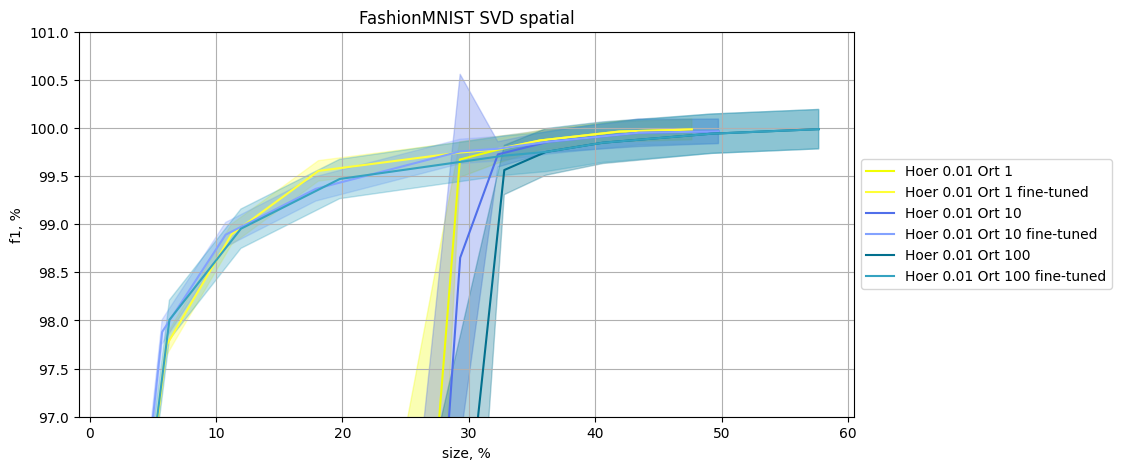

In [14]:
ax = show_svd_results(
    svd_exps=spatial_exps,
    figsize=(10, 5),
    title=f'{ds_name} SVD spatial',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(97, 101),
    # xlim=(0, 100)
)

In [3]:
best_svd = dict(channel='Hoer 0.1 Ort 10', spatial='Hoer 0.1 Ort 10')
best_channel = svd_channel[best_svd['channel']]
best_spatial = svd_spatial[best_svd['spatial']]
compare_dict = {
    "SFP percentage": sfp_per,
    "SFP energy": sfp_energy,
    "SVD channel": best_channel,
    "SVD spatial": best_spatial
}

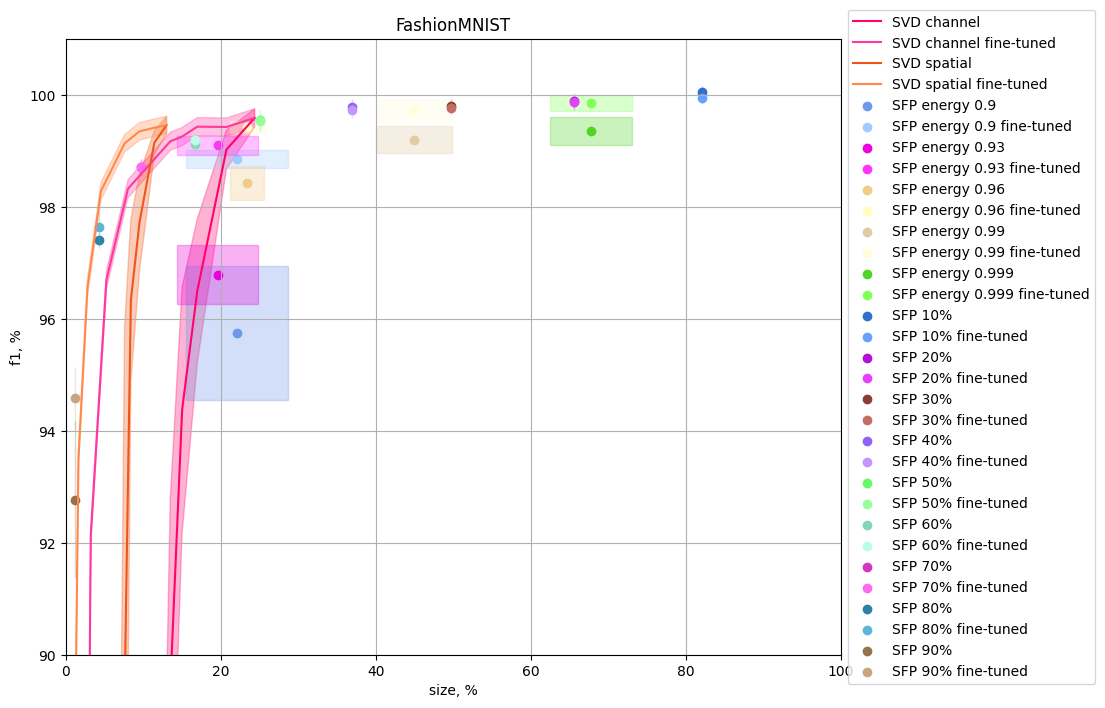

In [16]:
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([sfp_energy, sfp_per]),
    svd_exps={
        'SVD channel': best_channel,
        'SVD spatial': best_spatial,
    },
    figsize=(10, 8),
    title=f'{ds_name}',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 101),
    xlim=(0, 100)
)

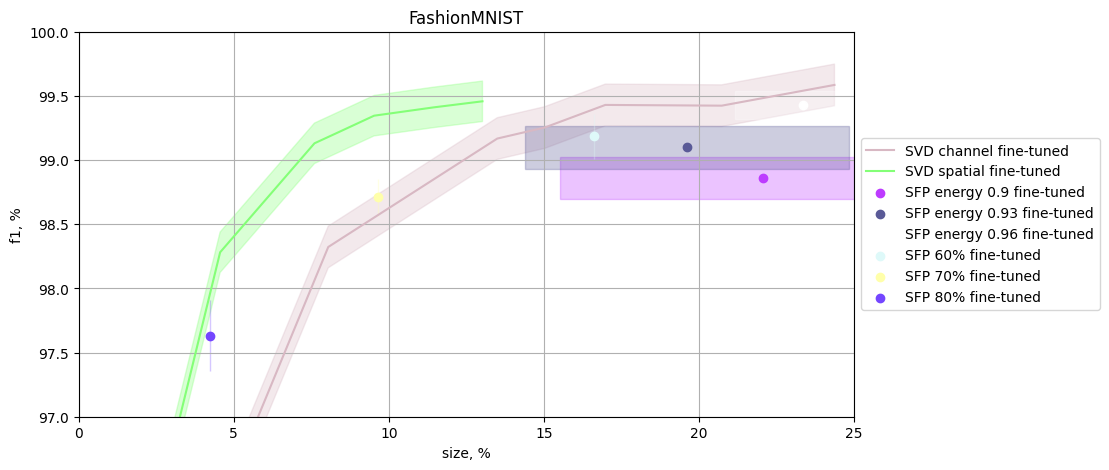

In [18]:
max_size = 25
min_f1 = 97
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([
        sfp_energy.loc[sfp_energy['size']<max_size].loc[sfp_energy['fine-tuned']>min_f1],
        sfp_per.loc[sfp_per['size']<max_size].loc[sfp_per['fine-tuned']>min_f1]
    ])[['size', 'size std', 'fine-tuned', 'fine-tuned std']],
    svd_exps={
        'SVD channel': best_channel[['size', 'fine-tuned', 'fine-tuned std']],
        'SVD spatial': best_spatial[['size', 'fine-tuned', 'fine-tuned std']],
    },
    figsize=(10, 5),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(min_f1, 100),
    xlim=(0, max_size)
)

In [19]:
results = {}
for percent in [100, 99, 97]:
    for phase in ['pruned', 'fine-tuned']:
        results[f'{percent}% {phase}'] = {}
        for k, v in compare_dict.items():
            tmp = v.loc[v[phase]>=percent]['size']
            results[f'{percent}% {phase}'][k] = f"{tmp.min():.0f} ({tmp.idxmin() if len(tmp)>0 else ''})"
results = pd.DataFrame(results).T
results

,SFP percentage,SFP energy,SVD channel,SVD spatial
100% pruned,82 (SFP 10%),nan (),nan (),nan ()
100% fine-tuned,nan (),nan (),nan (),nan ()
99% pruned,17 (SFP 60%),45 (SFP energy 0.99),21 (e_0.99),11 (e_0.99)
99% fine-tuned,17 (SFP 60%),20 (SFP energy 0.93),14 (e_0.9),8 (e_0.9)
97% pruned,4 (SFP 80%),23 (SFP energy 0.96),21 (e_0.99),10 (e_0.96)
97% fine-tuned,4 (SFP 80%),20 (SFP energy 0.93),8 (e_0.7),5 (e_0.7)


## FLOP

In [ ]:
from experiments.classificaion.simple_conv_net import load_simple_conv_net

compare_df = compare_inference(
    dataset_name=ds_name,
    exps=exps,
    compare_dict=compare_dict,
    best_svd=best_svd,
    sfp_load_fn=load_simple_conv_net
)
compare_df

In [5]:
compare_df.iloc[:, 4:]

,"size, %","flop, %","time, %","f1, %"
Baseline,100.000000,100.000000,100.000000,100.000000
SVD channel one_layer,13.721754,100.904436,102.283393,98.232198
SVD channel two_layers,13.721754,29.816698,105.334339,98.231335
SVD channel three_layers,13.721754,30.524144,104.771751,98.231339
SVD spatial one_layer,7.836445,101.238522,104.485606,98.108205
SVD spatial two_layers,7.836445,17.729341,103.649327,98.107970
SVD spatial three_layers,7.836445,18.212783,104.734420,98.108180
SFP percentage,16.754385,17.873947,100.600391,98.514867
SFP energy,19.744267,21.835039,100.068991,97.688316


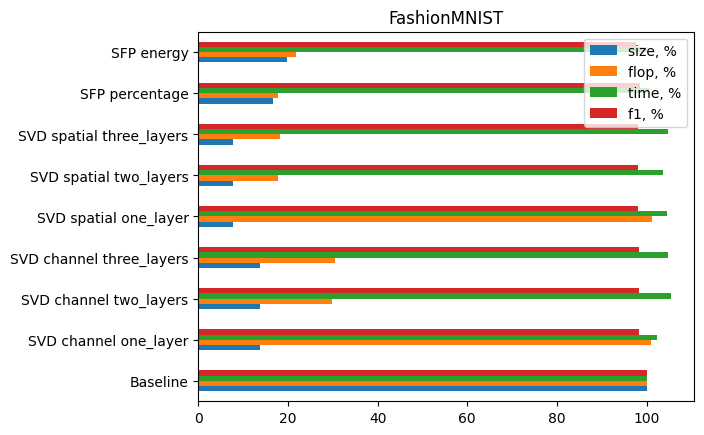

In [6]:
compare_df.iloc[:, 4:].plot(kind='barh', title=ds_name);

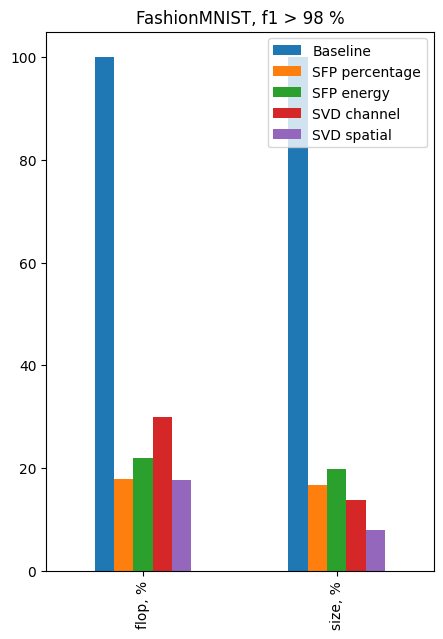

In [8]:
final_compare_df = compare_df.loc[['Baseline', 'SFP percentage', 'SFP energy'], ['flop, %', 'size, %']]
final_compare_df.loc['SVD channel', :] =  compare_df.loc['SVD channel two_layers', ['flop, %', 'size, %']]
final_compare_df.loc['SVD spatial', :] =  compare_df.loc['SVD spatial two_layers', ['flop, %', 'size, %']]
final_compare_df.T.plot(kind='bar', title=f'{ds_name}, f1 > 98 %', figsize=(5, 7));